In [1]:
import pandas as pd

In [38]:
df  = pd.read_csv("./WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [39]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [40]:
df.dropna( inplace=True)

In [41]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [42]:
df.label.value_counts()

1    36509
0    35028
Name: label, dtype: int64

In [43]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

c:\Users\kulde\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='label', ylabel='count'>

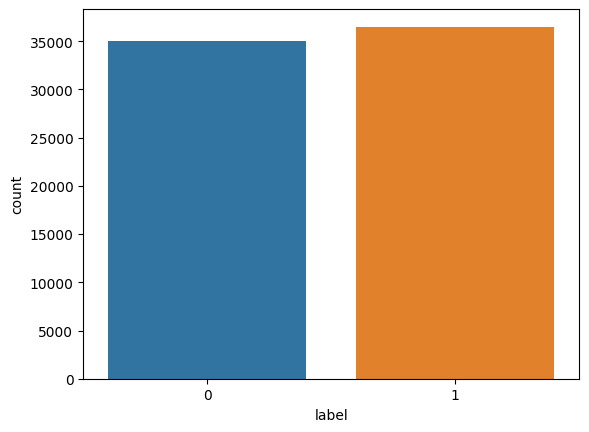

In [44]:
import seaborn as sns

sns.countplot(df.label)

In [45]:
df.reset_index(inplace=True)


In [2]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [47]:
df['combined_text'] = df['title'] + ' ' + df['text']

In [3]:
# Preprocessing function
def preprocess_text(text):
    ps = PorterStemmer()
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [49]:
df['preprocessed_text'] = df['combined_text'].apply(preprocess_text)

In [53]:
df.head(3)

,index,Unnamed: 0,title,text,label,combined_text,preprocessed_text
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,law enforc high alert follow threat cop white ...
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,unbeliev obama attorney gener say charlott rio...
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",bobbi jindal rais hindu use stori christian co...


In [ ]:
df.to_csv('file2.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import joblib
import tensorflow.keras as keras

In [ ]:
import gc
gc.collect()

In [5]:
import tensorflow as tf

In [6]:
df = pd.read_csv("file2.csv")

In [7]:
df.isna().sum()

index                 0
Unnamed: 0            0
title                 0
text                  0
label                 0
combined_text         0
preprocessed_text    44
dtype: int64

In [8]:
df.dropna( inplace=True)

In [9]:
X = df['preprocessed_text']
y = df['label']

In [30]:
X[0]

'law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video comment expect barack obama member fyf fukyoflag blacklivesmatt movement call lynch hang white peopl cop encourag other radio show tuesday night turn tide kill white peopl cop send messag kill black peopl america one f yoflag organ call sunshin radio blog show host texa call sunshin f ing opinion radio show snapshot fyf lolatwhitefear twitter page p show urg support call fyf tonight continu dismantl illus white snapshot twitter radio call invit fyf radio show air p eastern standard time show caller clearli call lynch kill white peopl minut clip radio show heard provid breitbart texa someon would like refer hannib alreadi receiv death threat result interrupt fyf confer call unidentifi black man said mother f ker start f ing like us bunch ni er takin one us roll said caus alreadi roll gang anyway six seven black mother f cker see white person lynch ass let turn tabl conspir cop start lose peopl state emerg 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0 , stratify=y)

In [16]:
y_train.value_counts() , y_test.value_counts()

(1    24431
 0    23469
 Name: label, dtype: int64,
 1    12034
 0    11559
 Name: label, dtype: int64)

In [17]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

In [18]:
transformed_X_train = vectorizer.fit_transform(X_train)

In [19]:
transformed_X_train = transformed_X_train.toarray()

In [20]:
transformed_X_train.shape

(47900, 5000)

In [21]:
transformed_X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [23]:
model = keras.Sequential([
    keras.layers.Dense(3000, input_shape=(5000,), activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
model.fit(transformed_X_train , y_train , epochs=7)

Epoch 1/7
1497/1497 [==============================] - 35s 23ms/step - loss: 0.1598 - accuracy: 0.9371
Epoch 2/7
1497/1497 [==============================] - 35s 23ms/step - loss: 0.0559 - accuracy: 0.9807
Epoch 3/7
1497/1497 [==============================] - 35s 23ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 4/7
1497/1497 [==============================] - 34s 23ms/step - loss: 0.0094 - accuracy: 0.9976
Epoch 5/7
1497/1497 [==============================] - 34s 23ms/step - loss: 0.0087 - accuracy: 0.9975
Epoch 6/7
1497/1497 [==============================] - 34s 23ms/step - loss: 0.0049 - accuracy: 0.9986
Epoch 7/7
1497/1497 [==============================] - 34s 23ms/step - loss: 0.0040 - accuracy: 0.9987


In [25]:
model.save('keras_model.h5')

In [26]:
import joblib

loaded_keras_model = keras.models.load_model('keras_model.h5')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
X_test_vectorized = loaded_vectorizer.transform(X_test).toarray()


predictions = loaded_keras_model.predict(X_test_vectorized)

In [27]:
predictions

array([[1.0000000e+00],
       [1.0000000e+00],
       [9.9999917e-01],
       ...,
       [3.7428493e-15],
       [5.3198694e-13],
       [3.9478242e-02]], dtype=float32)

In [28]:
y_pred = (predictions > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [29]:
y_pred[:5] , y_test[:5]

(array([[1],
        [1],
        [1],
        [0],
        [0]]),
 38235    1
 33922    1
 53925    1
 23655    0
 58288    0
 Name: label, dtype: int64)